Weight vector for normal regression is:
[7.99102098 1.32243102]
[0.02897445 1.48003118]


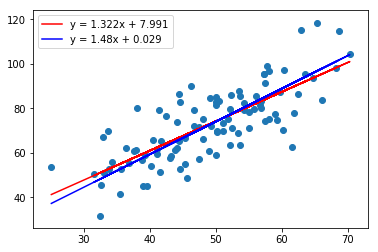

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


df1 = pd.read_csv("./data.csv", names=["x","y"])

x_ar = np.array(df1['x'])
y_arr = np.array(df1['y'])
temp = np.ones(shape=x_ar.shape)
x_arr = np.concatenate((temp.reshape(-1,1), x_ar.reshape(-1,1)), 1)
#print(x_arr)

coeffs = inv(x_arr.transpose().dot(x_arr)).dot(x_arr.transpose()).dot(y_arr)
print("Weight vector for normal regression is:")
print(coeffs)

y_pred = []
for i in x_ar:
    y_pred.append(coeffs[1]*i + coeffs[0])

y_pred = np.array(y_pred)

lr = 0.0001

threshold=0.0001
#print(x_arr)
#print(y_arr.reshape(-1,1))

def loss(theta,x):
    loss = 1/(2*len(x_arr))* np.sum((y_arr -np.sum(theta*x,axis=1))**2)
    return loss

def grad_descent():
    theta = np.array([0,0])
    min_risk = []
    theta_list = []
    for i in range(len(x_arr)):
        theta = theta + lr*(y_arr.reshape(-1,1)[i] - np.dot(theta,x_arr[i]))*x_arr[i]
        theta_list.append(theta)
        min_risk.append(loss(theta,x_arr))     
    
    return theta_list[min_risk.index(min(min_risk))]

coeffs2 = grad_descent()
print(coeffs2)

y_pred2 = []
for i in x_ar:
    y_pred2.append(coeffs2[1]*i + coeffs2[0])

plt.plot(x_ar, y_pred, "-r", label="y = " + str(round(coeffs[1],3)) + "x + " + str(round(coeffs[0],3)))
plt.plot(x_ar, y_pred2, "-b", label="y = " + str(round(coeffs2[1],3)) + "x + " + str(round(coeffs2[0],3)))
plt.scatter(x_ar,y_arr)
plt.legend()
plt.show()